In [3]:
import pandas as pd
df = pd.read_csv('Clean_Dataset.csv')

<ipython-input-3-5fb2e4e28218>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [3]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [15]:
df.airline.value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [5]:
df.source_city.value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [6]:
df.destination_city.value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [7]:
df.departure_time.value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [8]:
df.arrival_time.value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

In [9]:
df.stops.value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [11]:
df['class'].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

In [14]:
df['duration'].max()

49.83

In [15]:
df['duration'].min()

0.83

In [16]:
df['duration'].median()

11.25

## PREPROCESSING

In [5]:
df = df.drop('Unnamed: 0',axis=1)
df = df.drop('flight',axis=1)

df['class'] = df['class'].apply(lambda x: 1 if x=='Business' else 0)

In [6]:
df.stops = pd.factorize(df.stops)[0]

In [7]:
df = df.join(pd.get_dummies(df.source_city, prefix='source')).drop('source_city', axis=1)
df = df.join(pd.get_dummies(df.destination_city, prefix='dest')).drop('destination_city', axis=1)
df = df.join(pd.get_dummies(df.arrival_time, prefix='arrival')).drop('arrival_time', axis=1)
df = df.join(pd.get_dummies(df.departure_time, prefix='departure')).drop('departure_time', axis=1)

In [14]:
df

,stops,class,duration,days_left,price,source_Bangalore,source_Chennai,source_Delhi,source_Hyderabad,source_Kolkata,...,departure_Evening,departure_Late_Night,departure_Morning,departure_Night,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara
0,zero,0,2.17,1,5953,False,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False
1,zero,0,2.33,1,5953,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
2,zero,0,2.17,1,5956,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
3,zero,0,2.25,1,5955,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,True
4,zero,0,2.33,1,5955,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,one,1,10.08,49,69265,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,True
300149,one,1,10.42,49,77105,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
300150,one,1,13.83,49,79099,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
300151,one,1,10.00,49,81585,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [8]:
df = df.join(pd.get_dummies(df.airline, prefix='airline')).drop('airline', axis=1)

In [9]:
df = df.astype(int)

In [22]:
df

,airline,stops,class,duration,days_left,price,source_Bangalore,source_Chennai,source_Delhi,source_Hyderabad,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,departure_Afternoon,departure_Early_Morning,departure_Evening,departure_Late_Night,departure_Morning,departure_Night
0,SpiceJet,0,0,2.17,1,5953,False,False,True,False,...,False,False,False,True,False,False,True,False,False,False
1,SpiceJet,0,0,2.33,1,5953,False,False,True,False,...,False,False,True,False,False,True,False,False,False,False
2,AirAsia,0,0,2.17,1,5956,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
3,Vistara,0,0,2.25,1,5955,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
4,Vistara,0,0,2.33,1,5955,False,False,True,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,1,1,10.08,49,69265,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False
300149,Vistara,1,1,10.42,49,77105,False,True,False,False,...,False,False,False,True,True,False,False,False,False,False
300150,Vistara,1,1,13.83,49,79099,False,True,False,False,...,False,False,False,True,False,True,False,False,False,False
300151,Vistara,1,1,10.00,49,81585,False,True,False,False,...,True,False,False,False,False,True,False,False,False,False


## TRAINING REGRESSION MODEL

In [17]:
df

,stops,class,duration,days_left,price,source_Bangalore,source_Chennai,source_Delhi,source_Hyderabad,source_Kolkata,...,departure_Evening,departure_Late_Night,departure_Morning,departure_Night,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara
0,zero,0,2.17,1,5953,False,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False
1,zero,0,2.33,1,5953,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
2,zero,0,2.17,1,5956,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
3,zero,0,2.25,1,5955,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,True
4,zero,0,2.33,1,5955,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,one,1,10.08,49,69265,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,True
300149,one,1,10.42,49,77105,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
300150,one,1,13.83,49,79099,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
300151,one,1,10.00,49,81585,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [31]:
df

,stops,class,duration,days_left,price,source_Bangalore,source_Chennai,source_Delhi,source_Hyderabad,source_Kolkata,...,departure_Evening,departure_Late_Night,departure_Morning,departure_Night,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara
0,0,0,2,1,5953,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,2,1,5953,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,2,1,5956,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,2,1,5955,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,2,1,5955,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10,49,69265,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
300149,1,1,10,49,77105,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
300150,1,1,13,49,79099,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
300151,1,1,10,49,81585,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X, y =df.drop('price', axis=1), df.price

In [18]:
X

,stops,class,duration,days_left,source_Bangalore,source_Chennai,source_Delhi,source_Hyderabad,source_Kolkata,source_Mumbai,...,departure_Evening,departure_Late_Night,departure_Morning,departure_Night,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara
0,0,0,2,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,2,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,2,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,2,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,2,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10,49,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
300149,1,1,10,49,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
300150,1,1,13,49,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
300151,1,1,10,49,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [34]:
y

0          5953
1          5953
2          5956
3          5955
4          5955
          ...  
300148    69265
300149    77105
300150    79099
300151    81585
300152    81585
Name: price, Length: 300153, dtype: int32

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
reg = RandomForestRegressor(n_jobs=-1)

In [13]:
reg.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [14]:
reg.score(X_test, y_test)

0.9755475600211575

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math

y_pred = reg.predict(X_test)

print('R2: ',r2_score(y_test, y_pred))
print('MAE: ',mean_absolute_error(y_test, y_pred))
print('MSE: ',mean_squared_error(y_test, y_pred))
print('RMSE: ',math.sqrt(mean_squared_error(y_test, y_pred)))

R2:  0.9755475600211575
MAE:  1498.5687176960655
MSE:  12518387.611761307
RMSE:  3538.1333513254285


In [13]:
df

,stops,class,duration,days_left,price,source_Bangalore,source_Chennai,source_Delhi,source_Hyderabad,source_Kolkata,...,departure_Evening,departure_Late_Night,departure_Morning,departure_Night,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara
0,0,0,2,1,5953,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,2,1,5953,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,2,1,5956,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,2,1,5955,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,2,1,5955,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10,49,69265,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
300149,1,1,10,49,77105,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
300150,1,1,13,49,79099,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
300151,1,1,10,49,81585,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


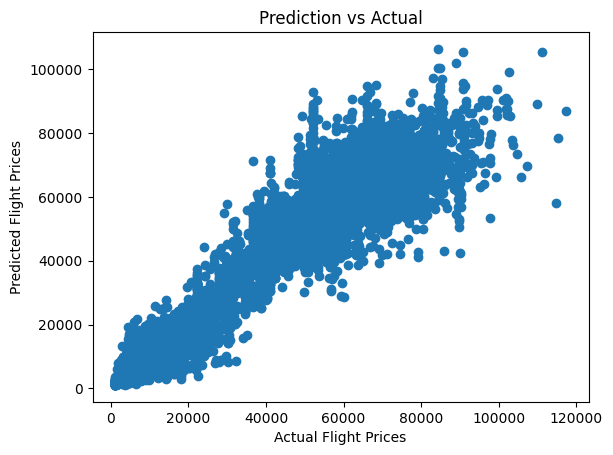

In [16]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred) 
plt.xlabel('Actual Flight Prices')
plt.ylabel('Predicted Flight Prices')
plt.title('Prediction vs Actual')
plt.show()

In [19]:
df.price.describe()

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

In [17]:
importances = dict(zip(reg.feature_names_in_,reg.feature_importances_))
sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)

sorted_importances

[('class', 0.882322153947552),
 ('duration', 0.050961113768656814),
 ('days_left', 0.02077398564496491),
 ('airline_Vistara', 0.0053079966264716625),
 ('airline_Air_India', 0.0047720601009449285),
 ('source_Delhi', 0.0035564174459453185),
 ('dest_Delhi', 0.003319355424553153),
 ('source_Mumbai', 0.002202807916609328),
 ('dest_Mumbai', 0.002146645630679569),
 ('source_Kolkata', 0.001832883606646773),
 ('dest_Kolkata', 0.0018169428958370781),
 ('stops', 0.0017629326647925058),
 ('arrival_Evening', 0.0016952209261857335),
 ('dest_Hyderabad', 0.0015319676985283634),
 ('dest_Bangalore', 0.00151825020205439),
 ('source_Hyderabad', 0.0014318111542056683),
 ('arrival_Night', 0.0013602183868221924),
 ('source_Bangalore', 0.0012700272463725317),
 ('departure_Evening', 0.0011934764754353876),
 ('arrival_Afternoon', 0.0010855359859520703),
 ('source_Chennai', 0.0010214188448965295),
 ('departure_Morning', 0.001018593996980734),
 ('departure_Early_Morning', 0.0009388618798646609),
 ('dest_Chennai',

<BarContainer object of 5 artists>

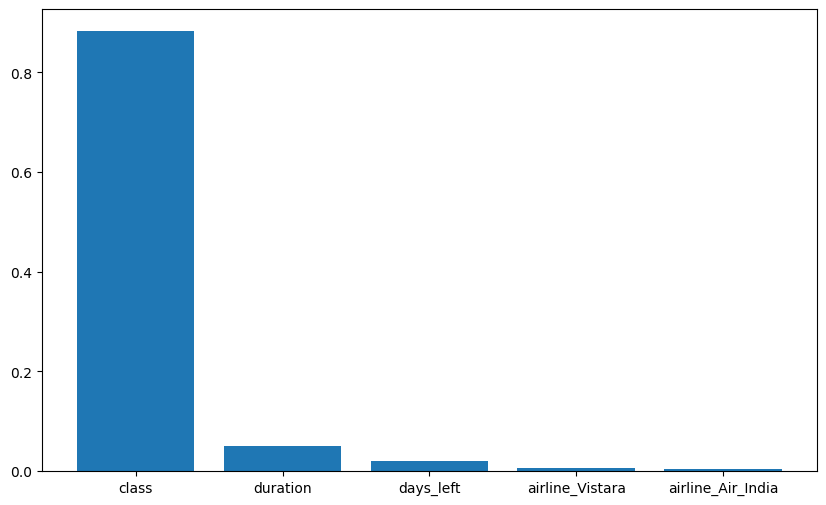

In [18]:
plt.figure(figsize=(10,6))
plt.bar([x[0] for x in sorted_importances[:5]], [x[1] for x in sorted_importances[:5]])

In [25]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(50, 100),  # Reduced range to lower memory usage
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'max_features': [1.0, 'sqrt', 'log2', None]  # Removed 'auto'
}

reg = RandomForestRegressor(n_jobs=-1)

random_search = RandomizedSearchCV(
    estimator=reg,
    param_distributions=param_dist,
    n_iter=10,  # Increased iterations back after reducing grid
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=2,
    random_state=10,
    n_jobs=2  # Reduce to 2 jobs to limit memory consumption
)

random_search.fit(X_train, y_train)
best_regressor = random_search.best_estimator_


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=99; total time=  12.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=99; total time=  12.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=99; total time=  12.6s
[CV] END max_depth=30, max_features=1.0, min_samples_leaf=2, min_samples_split=2, n_estimators=79; total time= 1.3min
[CV] END max_depth=30, max_features=1.0, min_samples_leaf=2, min_samples_split=2, n_estimators=79; total time= 1.3min
[CV] END max_depth=30, max_features=1.0, min_samples_leaf=2, min_samples_split=2, n_estimators=79; total time= 1.3min
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=92; total time=  12.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=92; total tim

In [26]:
best_regressor.score(X_test, y_test)

0.9801534069448555

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math

y_pred = best_regressor.predict(X_test)

print('R2: ',r2_score(y_test, y_pred))
print('MAE: ',mean_absolute_error(y_test, y_pred))
print('MSE: ',mean_squared_error(y_test, y_pred))
print('RMSE: ',math.sqrt(mean_squared_error(y_test, y_pred)))

R2:  0.9801534069448555
MAE:  1448.8851918806415
MSE:  10160431.631859966
RMSE:  3187.5431968618036


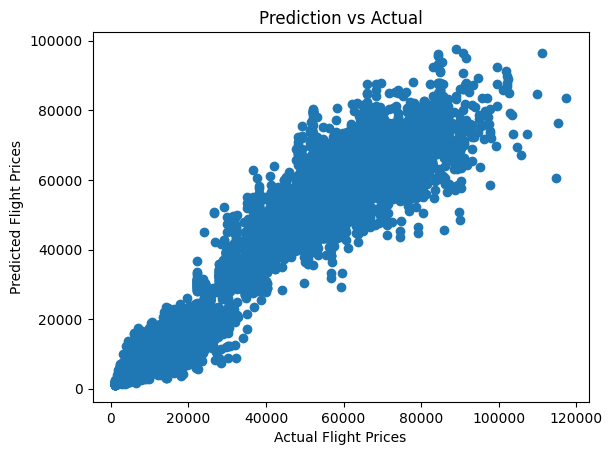

In [28]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred) 
plt.xlabel('Actual Flight Prices')
plt.ylabel('Predicted Flight Prices')
plt.title('Prediction vs Actual')
plt.show()

In [29]:
import numpy as np

# Example: features -> airline, day, other relevant features
new_data = np.array([[1, 5, 300]])  # Example values for features


In [31]:
print(X_train.shape)


(240122, 34)
